<a href="https://colab.research.google.com/github/iam-pattan/Exploring-ML/blob/main/pca_exploit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import 

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
col1 = df.columns
col = col1.drop(['target'])
col

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [ ]:
#One-Hot encoding
df.target.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
# Separating out the features
x = df.loc[:, col].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
scalar = MinMaxScaler(feature_range=(0,1))
X = scalar.fit_transform(x)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])

In [ ]:
pd.concat([principalDf, df.target], axis=1).head()

,PC 1,PC 2,target
0,-0.630361,0.111556,1
1,-0.623546,-0.100313,1
2,-0.669793,-0.047220,1
3,-0.654633,-0.098791,1
4,-0.648263,0.137558,1


In [ ]:
# test,train splits on PCA 
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, random_state=42, test_size=0.3) 

In [ ]:
# test, train splits on normal data
x_train, x_test, Y_train, Y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB

seed=3
clf = GaussianNB()
clf.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = clf.predict(y_test)

In [ ]:
prob_pos_clf = clf.predict_proba(X_test)[:, 1]

In [ ]:
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
cv_results = model_selection.cross_val_score(GaussianNB(), X_train, y_train.ravel(), cv=kfold, scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
cv_results.mean(), cv_results.std()

(0.9054545454545455, 0.08353749096480102)

In [ ]:
y_pred, y_test.T

(array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3]),
 array([[2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
         1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 3, 2, 2, 1,
         1]]))

This is classification on data without applying PCA

In [ ]:
clf2 = GaussianNB()
clf2.fit(x_train, Y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_pred = clf2.predict(Y_test)

In [ ]:
prob_pos_clf = clf2.predict_proba(x_test)[:, 1]

In [ ]:
#setting performance parameters
kfold2 = model_selection.KFold(n_splits=10)

#calling the cross validation function
cv2_results = model_selection.cross_val_score(GaussianNB(), x_train, Y_train.ravel(), cv=kfold2, scoring='accuracy')

In [ ]:
cv2_results.mean(), cv2_results.std()

(0.9245454545454546, 0.07998450263117865)

In [ ]:
Y_pred, Y_test.T

(array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3]),
 array([[2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
         1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 3, 2, 2, 1,
         1]]))

### Using KNN algo

In [ ]:
from sklearn import neighbors
classifier=neighbors.KNeighborsClassifier()

In [ ]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
predictions=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions) * 100

95.55555555555556

Without PCA  😑

In [ ]:
classifier.fit(x_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
prediction=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,prediction) * 100

100.0

### Now we geek with PCA on image 

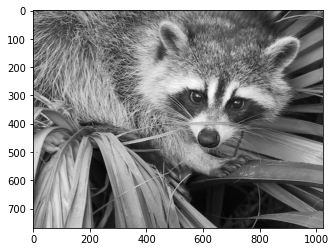

In [ ]:
from scipy.misc import face
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim

img1 = face(gray=True)
img = img1.astype(np.uint8)
img = img / 255
plt.imshow(img, cmap='gray')

In [ ]:
faces_pca = PCA(n_components=0.95)
faces_pca.fit(img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
components = faces_pca.transform(img)
projected = faces_pca.inverse_transform(components)

(768, 1024)
ssim difference between the image before and after PCA: 0.86


Text(0.5, 1.0, 'pca=0.95')

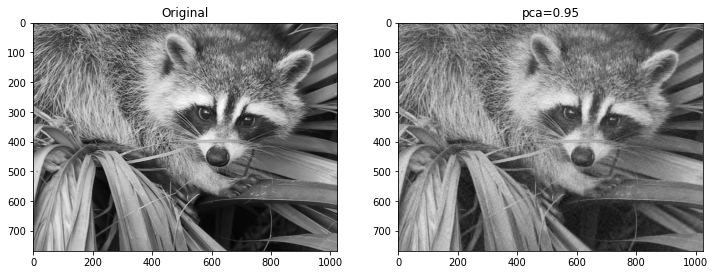

In [ ]:
print(projected.shape)
s = ssim(img, projected)
print("ssim difference between the image before and after PCA: {:.2f}".format(s))
plt.rcParams['figure.figsize'] = (12,8)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original')
plt.subplot(122), plt.imshow(projected, cmap='gray')
plt.title('pca=0.95')

In [ ]:
projected

<function ndarray.tobytes>

Tring with different values on pca

In [ ]:
i, faces_pca, compressed = 0, [], []
for thres in [0.4,0.6,0.8]:
  face_pca = PCA(n_components=thres)
  face_pca.fit(img)
  faces_pca.append(face_pca)
  components = faces_pca[i].transform(img)
  projected = faces_pca[i].inverse_transform(components)
  compressed.append(projected)
  i += 1

In [ ]:
compressed[0].shape

(768, 1024)

ssim difference between the image before and after PCA: 0.52 - 0.56 - 0.63


Text(0.5, 1.0, 'PCA=0.4')

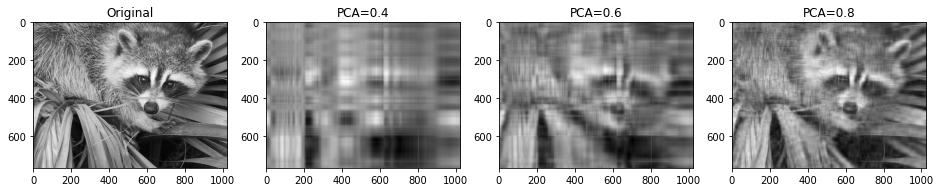

In [ ]:
s1 = ssim(img, compressed[0])
s2 = ssim(img, compressed[1])
s3 = ssim(img, compressed[2])
print("ssim difference between the image before and after PCA: {:.2f} - {:.2f} - {:.2f}".format(s1, s2, s3))

plt.rcParams['figure.figsize'] = (16,12)
plt.subplot(141), plt.imshow(img, cmap='gray')
plt.title('Original')
plt.subplot(144), plt.imshow(compressed[2], cmap='gray')
plt.title('PCA=0.8')
plt.subplot(143), plt.imshow(compressed[1], cmap='gray')
plt.title('PCA=0.6')
plt.subplot(142), plt.imshow(compressed[0], cmap='gray')
plt.title('PCA=0.4')

In [ ]:
plt.imsave('/content/img.png',img)
plt.imsave('/content/img1.png',projected)
plt.imsave('/content/img2.png',compressed[0])
plt.imsave('/content/img3.png',compressed[1])
plt.imsave('/content/img4.png',compressed[2])

In [ ]:
import os
org = os.path.getsize('/content/img.png')/(1024*1024) 
pca1 = os.path.getsize('/content/img1.png')/(1024*1024) 
pca2 = os.path.getsize('/content/img2.png')/(1024*1024) 
pca3 = os.path.getsize('/content/img3.png')/(1024*1024) 
pca4 = os.path.getsize('/content/img4.png')/(1024*1024) 
print(f'original: {org},\n pca0.95: {pca1},\n pca0.4: {pca2},\n pca0.6: {pca3},\n pca0.8: {pca4} in MB')

original: 1.2701349258422852,
 pca0.95: 0.7634544372558594,
 pca0.4: 0.4691629409790039,
 pca0.6: 0.5795440673828125,
 pca0.8: 0.7634544372558594 in MB
